In [389]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
path_to_data = '/Users/jokkojja/Downloads/archive'

In [391]:
train_name = 'DailyDelhiClimateTrain.csv'
test_name = 'DailyDelhiClimateTest.csv'

In [392]:
dataset_train = pd.read_csv(os.path.join(path_to_data, train_name), parse_dates=True)
dataset_test = pd.read_csv(os.path.join(path_to_data, test_name), parse_dates=True)

In [393]:
dataset_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


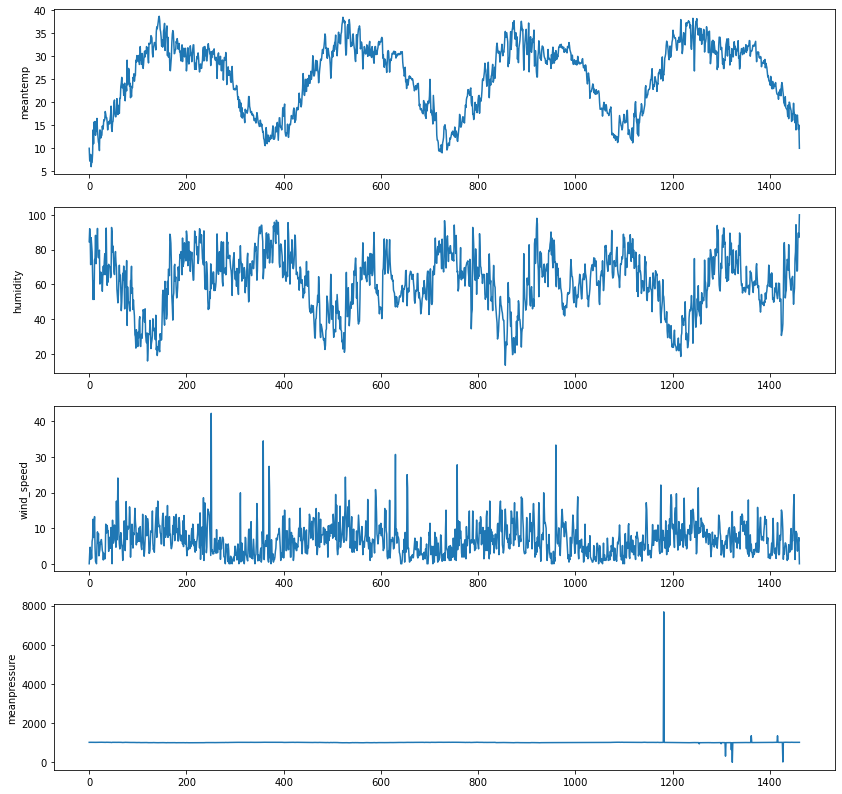

In [394]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14,14))
for i, column in enumerate(dataset_train.columns[1:]):
    sns.lineplot(y = dataset_train[column], x = dataset_train.index, ax = ax[i])

In [395]:
train = dataset_train['meantemp'].values
train = train.reshape(train.shape[0], 1)

scaler = MinMaxScaler(feature_range = (0,1))
scaled_train = scaler.fit_transform(train)

In [396]:
x_train = scaled_train[:scaled_train.shape[0]//2]
y_train = scaled_train[scaled_train.shape[0]//2:]
print(f'x_train shape - {x_train.shape}, y_train shape - {y_train.shape}')

x_train shape - (731, 1), y_train shape - (731, 1)


In [397]:
model_meantemp = Sequential([
    LSTM(8,input_shape=(1,1,)),
    Dense(16,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1)
])
model_meantemp.summary()
model_meantemp.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 8)                 320       
                                                                 
 dense_39 (Dense)            (None, 16)                144       
                                                                 
 dense_40 (Dense)            (None, 32)                544       
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


In [398]:
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
y_train = y_train.reshape(y_train.shape[0], 1, y_train.shape[1])

In [399]:
model_meantemp.fit(x_train, y_train, batch_size = 16, epochs = 50, verbose=1)

Epoch 1/50
46/46 [==============================] - 3s 4ms/step - loss: 0.2651
Epoch 2/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0419
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0228
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0193
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 6/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0115
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 8/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 10/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 11/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 12/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 13/50
46/46 [==============================

In [400]:
train_predict = model_meantemp.predict(x_train)

23/23 [==============================] - 0s 2ms/step


In [401]:
train_predict = scaler.inverse_transform(train_predict)

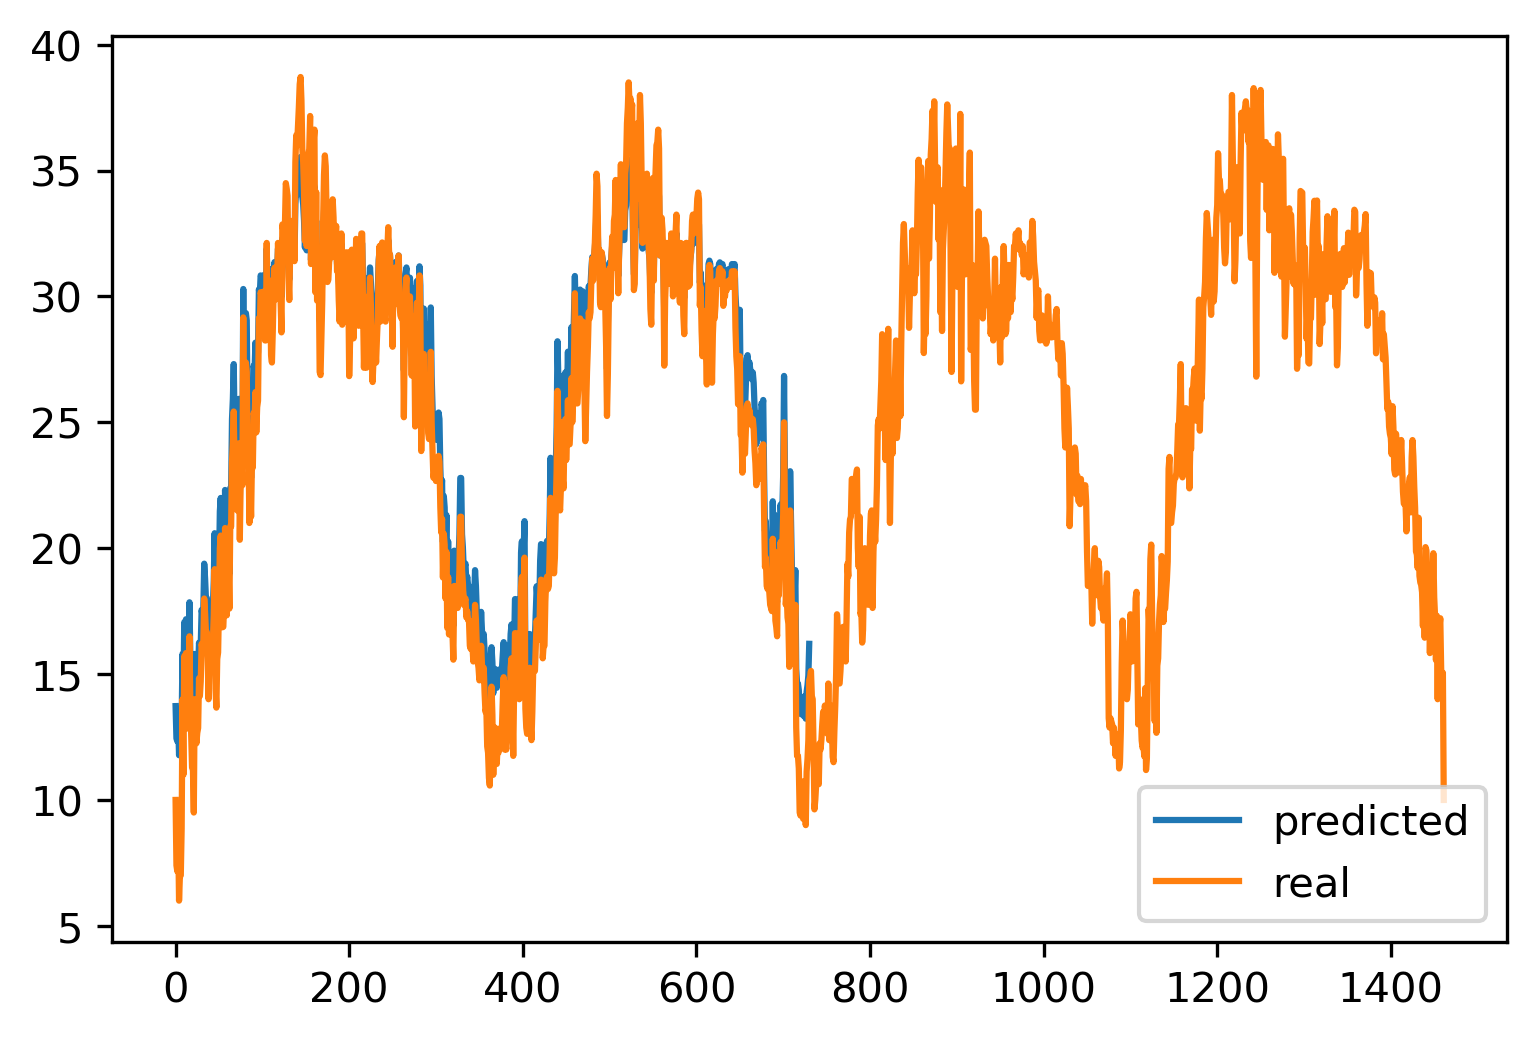

In [409]:
# plt.plot(scaler.inverse_transform(train))
plt.figure(dpi=300)
plt.plot(train_predict, label = 'predicted')
plt.plot(dataset_train['meantemp'], label='real')
plt.legend()
# plt.plot(test_predict)

In [410]:
test = dataset_test['meantemp'].values
test = test.reshape(test.shape[0], 1)
scaled_test= scaler.fit_transform(test)
x_test = scaled_test[:scaled_test.shape[0]//2]
y_test = scaled_test[scaled_test.shape[0]//2:]
print(f'x_train shape - {x_test.shape}, y_train shape - {y_test.shape}')

x_train shape - (57, 1), y_train shape - (57, 1)


In [411]:
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
# y_test = y_test.reshape(y_test.shape[0], 1, y_test.shape[1])

In [412]:
test_pred = scaler.inverse_transform(model_meantemp.predict(x_test))
y_test = scaler.inverse_transform(y_test)

2/2 [==============================] - 0s 4ms/step


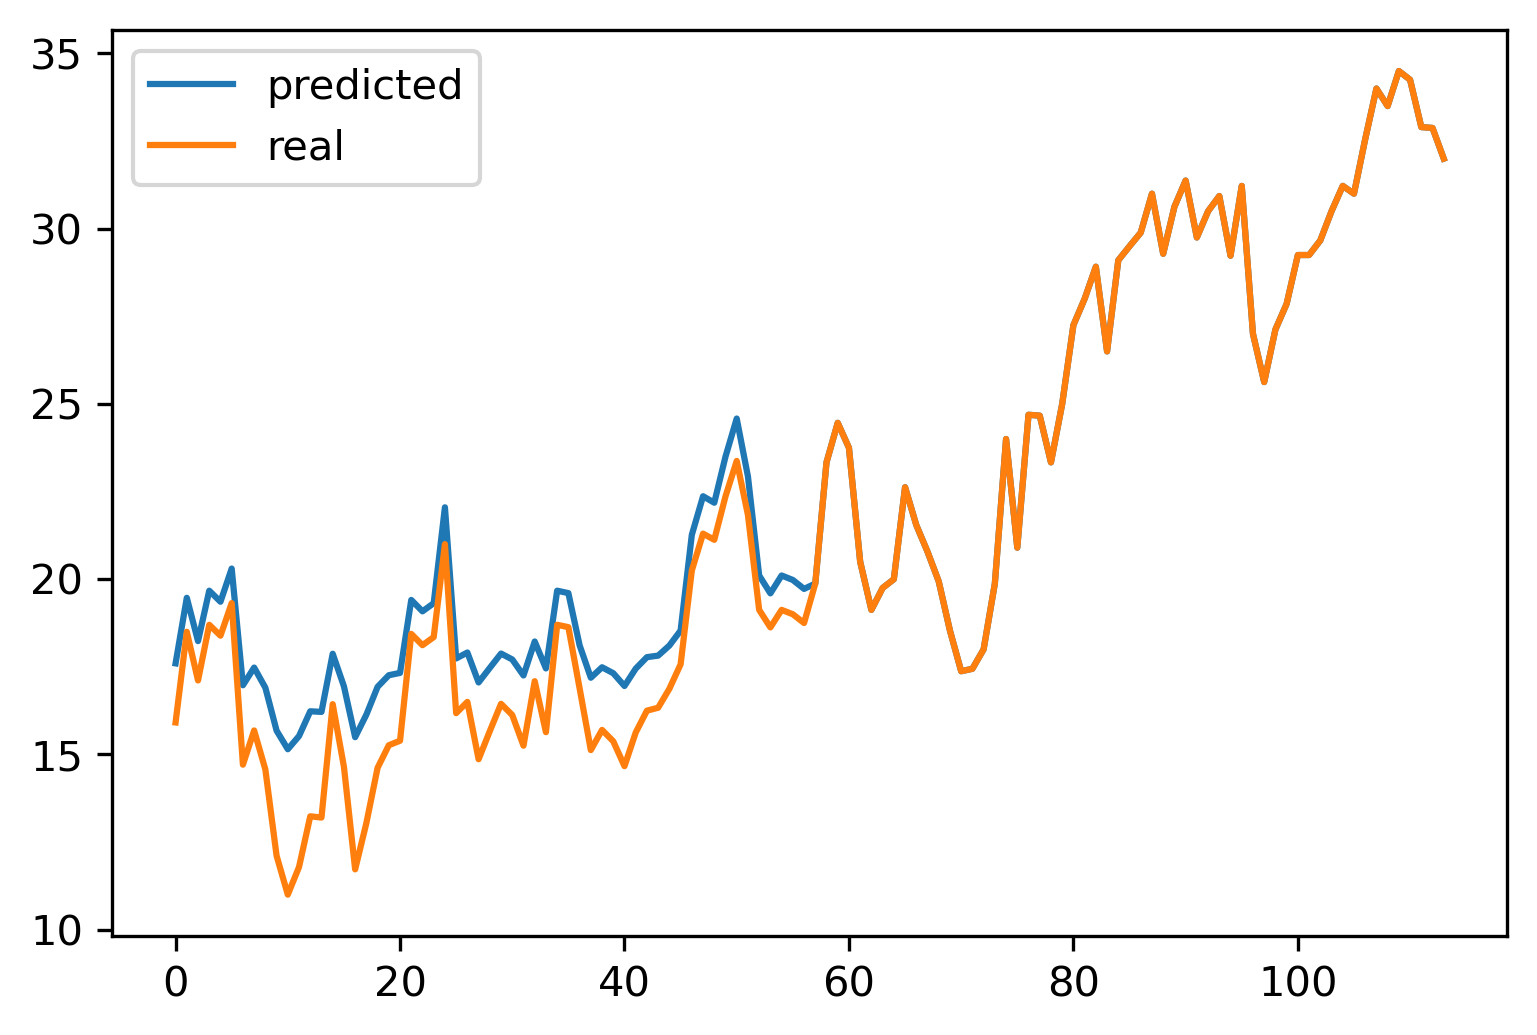

In [420]:
plt.figure(dpi=300)
plt.plot(full_test_pred, label = 'predicted')
plt.plot(dataset_test['meantemp'], label='real')
plt.legend()